In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Veri setini yükleme
print("Veri seti yükleniyor...")
CreditCardData = pd.read_csv('../data/creditcard.csv')
print("Veri seti yüklendi.")

# Veri boyutunu azaltma (örneklem alma)
print("Veri boyutu azaltılıyor...")
CreditCardData = CreditCardData.sample(frac=0.2, random_state=42)
print("Veri boyutu azaltıldı.")

# Özellikleri ölçeklendirme
print("Özellikler ölçeklendiriliyor...")
scaler = StandardScaler()
CreditCardData['Amount_Scaled'] = scaler.fit_transform(CreditCardData[['Amount']])
print("Özellikler ölçeklendirildi.")

# Saat bilgisi ekleme (Time sütunu saat cinsine çevriliyor)
print("Saat bilgisi ekleniyor...")
CreditCardData['Hour'] = (CreditCardData['Time'] // 3600) % 24
print("Saat bilgisi eklendi.")

# 'Time' ve 'Amount' kolonlarını kaldırma
print("'Time' ve 'Amount' kolonları kaldırılıyor...")
CreditCardData = CreditCardData.drop(columns=['Time', 'Amount'])
print("'Time' ve 'Amount' kolonları kaldırıldı.")

# Özellikler (X) ve hedef (y) değişkenini ayırma
print("Özellikler ve hedef değişkeni ayrılıyor...")
X = CreditCardData.drop(columns=['Class'])
y = CreditCardData['Class']
print("Özellikler ve hedef değişkeni ayrıldı.")

# Eğitim ve test verilerine ayırma
print("Eğitim ve test verileri ayrılıyor...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Eğitim ve test verileri ayrıldı.")

# SMOTE ile veri dengeleme
print("Veri dengeleniyor...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Veri dengelendi.")

# GridSearchCV ayarları
print("Hiperparametre optimizasyonu başlatılıyor...")
svm_param_grid = {
    'C': [1, 10],  # Daha dar aralık
    'gamma': [0.1, 0.01],
    'kernel': ['rbf']
}

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

# GridSearchCV ile en iyi parametreleri bulma
print("SVM ve Random Forest için GridSearchCV başlatılıyor...")
svm_grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), svm_param_grid, scoring='f1', cv=3, n_jobs=-1)
rf_grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), rf_param_grid, scoring='f1', cv=3, n_jobs=-1)

print("SVM GridSearchCV çalıştırılıyor...")
svm_grid_search.fit(X_train_smote, y_train_smote)
print("SVM GridSearchCV tamamlandı.")

print("Random Forest GridSearchCV çalıştırılıyor...")
rf_grid_search.fit(X_train_smote, y_train_smote)
print("Random Forest GridSearchCV tamamlandı.")

# En iyi parametreleri yazdırma
print("En iyi SVM parametreleri:", svm_grid_search.best_params_)
print("En iyi Random Forest parametreleri:", rf_grid_search.best_params_)

# Optimize edilmiş modelleri eğitme
print("SVM modelini eğitiyor...")
optimized_svm_model = SVC(**svm_grid_search.best_params_, class_weight='balanced', random_state=42)
optimized_svm_model.fit(X_train_smote, y_train_smote)
print("SVM modeli eğitildi.")

print("Random Forest modelini eğitiyor...")
optimized_rf_model = RandomForestClassifier(**rf_grid_search.best_params_, class_weight='balanced', random_state=42)
optimized_rf_model.fit(X_train_smote, y_train_smote)
print("Random Forest modeli eğitildi.")

# Test verisi üzerinde değerlendirme
print("SVM modelini test verisi üzerinde değerlendiriyor...")
svm_predictions = optimized_svm_model.predict(X_test)
print("SVM modelinin değerlendirilmesi tamamlandı.")

print("Random Forest modelini test verisi üzerinde değerlendiriyor...")
rf_predictions = optimized_rf_model.predict(X_test)
print("Random Forest modelinin değerlendirilmesi tamamlandı.")

print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Veri seti yükleniyor...
Veri seti yüklendi.
Veri boyutu azaltılıyor...
Veri boyutu azaltıldı.
Özellikler ölçeklendiriliyor...
Özellikler ölçeklendirildi.
Saat bilgisi ekleniyor...
Saat bilgisi eklendi.
'Time' ve 'Amount' kolonları kaldırılıyor...
'Time' ve 'Amount' kolonları kaldırıldı.
Özellikler ve hedef değişkeni ayrılıyor...
Özellikler ve hedef değişkeni ayrıldı.
Eğitim ve test verileri ayrılıyor...
Eğitim ve test verileri ayrıldı.
Veri dengeleniyor...
Veri dengelendi.
Hiperparametre optimizasyonu başlatılıyor...
SVM ve Random Forest için GridSearchCV başlatılıyor...
SVM GridSearchCV çalıştırılıyor...
SVM GridSearchCV tamamlandı.
Random Forest GridSearchCV çalıştırılıyor...
Random Forest GridSearchCV tamamlandı.
En iyi SVM parametreleri: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
En iyi Random Forest parametreleri: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
SVM modelini eğitiyor...
SVM modeli eğitildi.
Random Forest modelini eğitiyor...
Random Forest modeli eğitild

SVM Confusion Matrix'i çiziliyor...


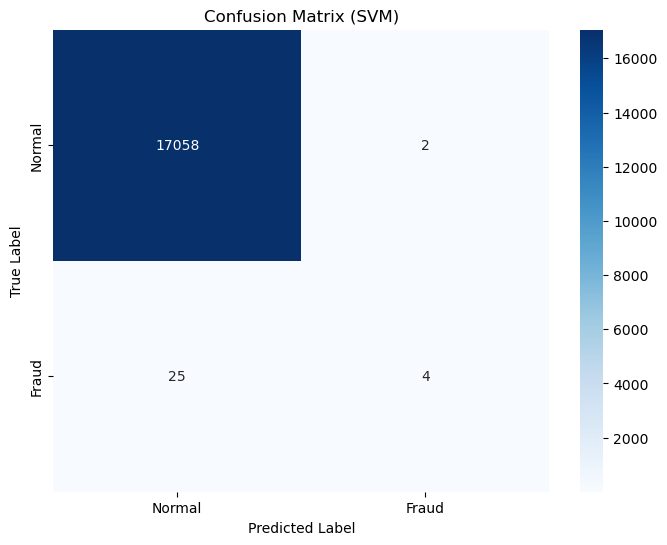

SVM Confusion Matrix çizildi.
Random Forest Confusion Matrix'i çiziliyor...


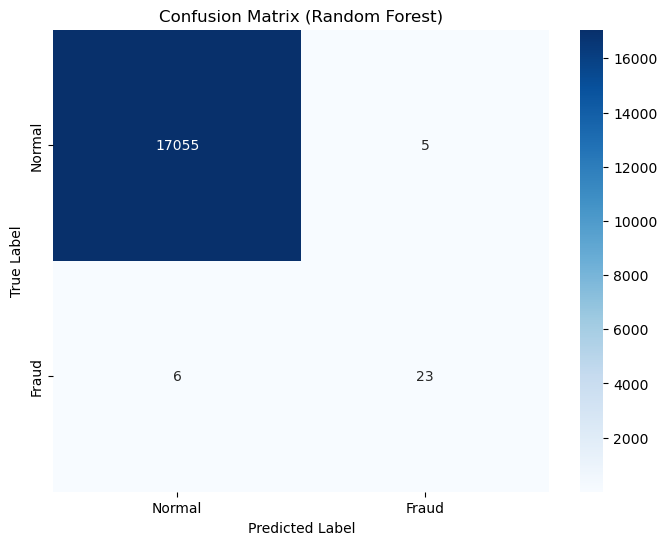

Random Forest Confusion Matrix çizildi.
SVM ROC eğrisi çiziliyor...


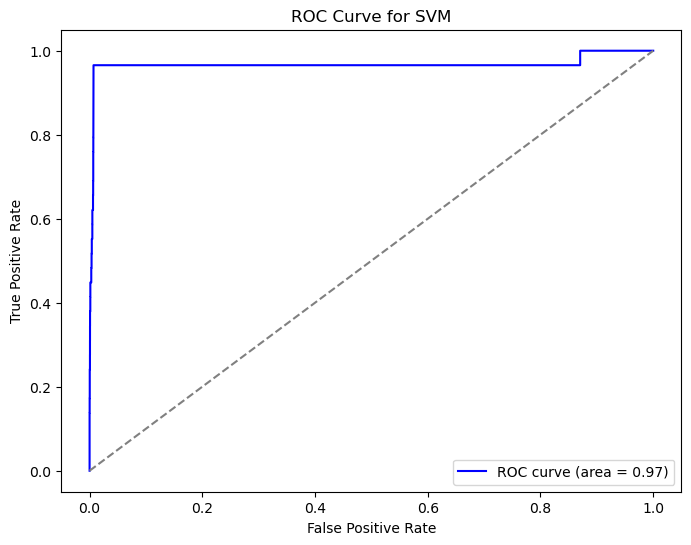

SVM ROC eğrisi çizildi.
Random Forest ROC eğrisi çiziliyor...


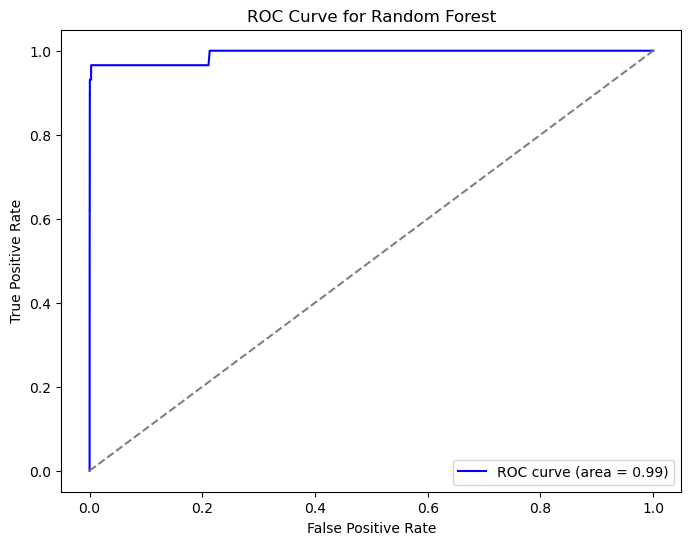

Random Forest ROC eğrisi çizildi.


In [2]:
# Confusion Matrix görselleştirme fonksiyonu
def plot_confusion_matrix(cm, title='Confusion Matrix', labels=['Normal', 'Fraud']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# ROC eğrisi görselleştirme fonksiyonu
def plot_roc_curve(y_true, y_pred_proba, model_name='Model'):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Confusion Matrix çizimleri
print("SVM Confusion Matrix'i çiziliyor...")
cm_svm = confusion_matrix(y_test, svm_predictions)
plot_confusion_matrix(cm_svm, title='Confusion Matrix (SVM)')
print("SVM Confusion Matrix çizildi.")

print("Random Forest Confusion Matrix'i çiziliyor...")
cm_rf = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm_rf, title='Confusion Matrix (Random Forest)')
print("Random Forest Confusion Matrix çizildi.")

# ROC eğrisi çizimleri
print("SVM ROC eğrisi çiziliyor...")
plot_roc_curve(y_test, optimized_svm_model.decision_function(X_test), model_name='SVM')
print("SVM ROC eğrisi çizildi.")

print("Random Forest ROC eğrisi çiziliyor...")
rf_probabilities = optimized_rf_model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, rf_probabilities, model_name='Random Forest')
print("Random Forest ROC eğrisi çizildi.")

In [4]:
import joblib

# Random Forest modelini kaydetme
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [5]:
# Modelin kullandığı özellik isimlerini yazdır (Random Forest)
print("Modelin kullandığı özellikler:")
print(rf_model.feature_names_in_)

Modelin kullandığı özellikler:
['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'Amount']
